### Objective
### This file determines the feature importance for dataframe df_4
### according to the second approach which is defined in README file.
### The samples of the considered datframe are grouped in clusters
### according to the kmeans++ algorithm.
### For each cluster, five configurable AI models are fitted and the best model (configured 
### for the best hyperparameter values amoing the experimented ones)
### is determined through gridsearchcv. 
### The coefficients of the best model (best among the experimented oned)
### determine the feature importance.

In [1]:
import pandas as pd
import numpy as np

#import it from the notebook
import import_ipynb
from  cc_fi_initializing_variables  import *
import cc_fi_fcts_data_treatment
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster

import os


from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

import pickle

importing Jupyter notebook from cc_fi_initializing_variables.ipynb
importing Jupyter notebook from cc_fi_fcts_data_treatment.ipynb


In [2]:
#clusters of the dataframe v_dataframe_1=df_4
#obtained by kmeans algo
val_name_di_dfs_per_cluster_for_pickle_1

'my_di_km_clusters_1.pkl'

## Examination of the clusters obtained for dataframe df_4 standardized  and kmeans++ algo

In [3]:
#variable of the dictionary saved in memory containing
#the dataframes with the samples belonging to each cluster
#resulting from the kmeans++ algo
#these clusters were determined in file cc_fi_1.
val_name_di_dfs_per_cluster_for_pickle_1_stand_kmpp

'my_di_km_clusters_1_stand_kmpp.pkl'

In [4]:
#di_df=dict, key=id cluster, value=dataframe comprised of the samples
#of dataframe df_4 standardized beloging to cluster id cluster

#samples of df_4_stand were assigned to four clusters using kmeans++ algo
#see file cc_fi_1
#we load from memory the dictionary with the dataframes
#containing the samples per cluster
di_df=pd.read_pickle(val_name_di_dfs_per_cluster_for_pickle_1_stand_kmpp)

#the keys of the dictionary are the cluster id. 
#Three clusters were created.
di_df.keys()

dict_keys([0, 1, 2])

In [5]:
#dataframe whose samples belong to cluster 0
di_df[0].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
32,2.158089,0.635668,-0.057443,1.290573,0.785692,0.953489,1.162480,-0.288325,-0.232639,0.123079,2.012042,0.606454,0.658821,1.418892,0.637762,1.792392
33,2.109846,1.106290,0.547427,0.532771,1.279660,0.953431,0.152052,-0.288356,-0.645579,0.122937,2.011954,1.191894,0.658774,1.418768,-1.169334,1.789387
35,2.143470,0.778280,0.547427,0.532867,0.866319,0.953472,0.152086,-0.288334,-0.774075,0.123036,2.012015,0.783860,0.658807,1.418855,0.936780,1.791481
36,2.080607,1.391516,-0.208661,0.532688,1.723677,0.953396,1.162382,-0.288374,-0.637805,0.122851,2.011901,1.546705,0.693763,1.612322,0.936310,1.787566
38,2.121541,0.992200,0.698645,0.652426,0.939684,0.953445,0.152064,-0.288348,-0.639869,0.122971,2.011976,1.049969,0.658785,1.612613,-1.169267,1.790115


In [6]:
#dataframe whose samples belong to cluster 1
di_df[1].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
191,1.126424,-1.360200,0.396210,-0.622634,-0.931981,-0.968501,-1.387617,-0.288193,0.091935,0.123680,-0.487377,-0.184296,-1.490242,-1.017914,-1.167902,1.805133
215,1.122955,-1.074974,-1.569620,-0.475760,-1.329861,-0.968536,-1.387657,-0.288212,0.676575,0.123594,-0.487391,-1.521752,-1.490284,-1.017955,-0.449201,1.803313
268,1.118619,-0.718442,-0.662314,-1.880243,-0.340580,-0.968581,-1.387707,-0.288236,-0.359017,0.123487,-0.487408,-0.184296,0.694169,0.272955,0.853361,1.801036
364,1.120094,-0.839663,-0.813531,0.207843,-0.262318,0.953670,0.152253,-0.288228,0.950486,0.123523,-0.487402,-1.219940,-1.490319,-0.451403,0.853398,1.801810
367,1.111681,-0.147990,1.001080,0.533137,-0.518341,0.953585,-1.387786,-0.288273,-0.799401,0.123315,-0.487435,-0.184296,0.658899,-0.451510,-1.714749,1.797395


In [7]:
#dataframe whose samples belong to cluster 2
di_df[2].head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
126,2.362684,-1.360200,0.849863,0.533491,0.205801,0.426543,0.152306,-0.288193,-0.234998,0.123680,-0.487377,-1.876342,0.694293,-0.054323,0.853556,1.805133
127,2.362684,-1.360200,1.001080,0.533491,0.205801,0.426543,0.152306,-0.288193,-0.228119,0.123680,-0.487377,-1.876342,0.694293,-0.054323,0.853556,1.805133
128,2.362684,-1.360200,0.849863,0.533491,0.205801,0.426543,0.152306,-0.288193,-0.255194,0.123680,-0.487377,-1.876342,0.694293,-0.054323,0.853556,1.805133
219,1.124256,-1.181934,-2.628143,-0.517610,-1.176526,-3.595801,0.152288,-0.288205,0.209463,0.123626,-0.487385,-0.184296,0.694259,-1.017940,0.853502,1.803995
239,1.126424,-1.360200,1.001080,0.533491,-0.063950,-0.968501,1.162739,-0.288193,-0.691639,0.123680,-0.487377,-0.184296,0.659020,0.780824,0.938418,1.805133


In [8]:
#information on the datframe with samples belonging to the first cluster
di_df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16857 entries, 32 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        16857 non-null  float64
 1   price         16857 non-null  float64
 2   year          16857 non-null  float64
 3   manufacturer  16857 non-null  float64
 4   model         16857 non-null  float64
 5   condition     16857 non-null  float64
 6   cylinders     16857 non-null  float64
 7   fuel          16857 non-null  float64
 8   odometer      16857 non-null  float64
 9   title_status  16857 non-null  float64
 10  transmission  16857 non-null  float64
 11  VIN           16857 non-null  float64
 12  drive         16857 non-null  float64
 13  type          16857 non-null  float64
 14  paint_color   16857 non-null  float64
 15  state         16857 non-null  float64
dtypes: float64(16)
memory usage: 2.2 MB


In [9]:
#information on the datframe with samples belonging to the 2nd cluster
di_df[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22553 entries, 191 to 426793
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        22553 non-null  float64
 1   price         22553 non-null  float64
 2   year          22553 non-null  float64
 3   manufacturer  22553 non-null  float64
 4   model         22553 non-null  float64
 5   condition     22553 non-null  float64
 6   cylinders     22553 non-null  float64
 7   fuel          22553 non-null  float64
 8   odometer      22553 non-null  float64
 9   title_status  22553 non-null  float64
 10  transmission  22553 non-null  float64
 11  VIN           22553 non-null  float64
 12  drive         22553 non-null  float64
 13  type          22553 non-null  float64
 14  paint_color   22553 non-null  float64
 15  state         22553 non-null  float64
dtypes: float64(16)
memory usage: 2.9 MB


In [10]:
#information on the datframe with samples belonging to the 3rd cluster
di_df[2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 126 to 426836
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        21595 non-null  float64
 1   price         21595 non-null  float64
 2   year          21595 non-null  float64
 3   manufacturer  21595 non-null  float64
 4   model         21595 non-null  float64
 5   condition     21595 non-null  float64
 6   cylinders     21595 non-null  float64
 7   fuel          21595 non-null  float64
 8   odometer      21595 non-null  float64
 9   title_status  21595 non-null  float64
 10  transmission  21595 non-null  float64
 11  VIN           21595 non-null  float64
 12  drive         21595 non-null  float64
 13  type          21595 non-null  float64
 14  paint_color   21595 non-null  float64
 15  state         21595 non-null  float64
dtypes: float64(16)
memory usage: 2.8 MB


In [11]:
#the names of the features
v_titles=di_df[0].columns.tolist()



val_name_dataframe_cluster_0="df_4_stand_km++_first_cluster"

val_name_dataframe_cluster_1="df_4_stand_km++_second_cluster"

val_name_dataframe_cluster_2="df_4_stand_km++_third_cluster"

#variable val_colors_for_feature_subplots is a 
#list with colors initialized in file 
#cc_fi_initializing_variables
v_colors=val_colors_for_feature_subplots


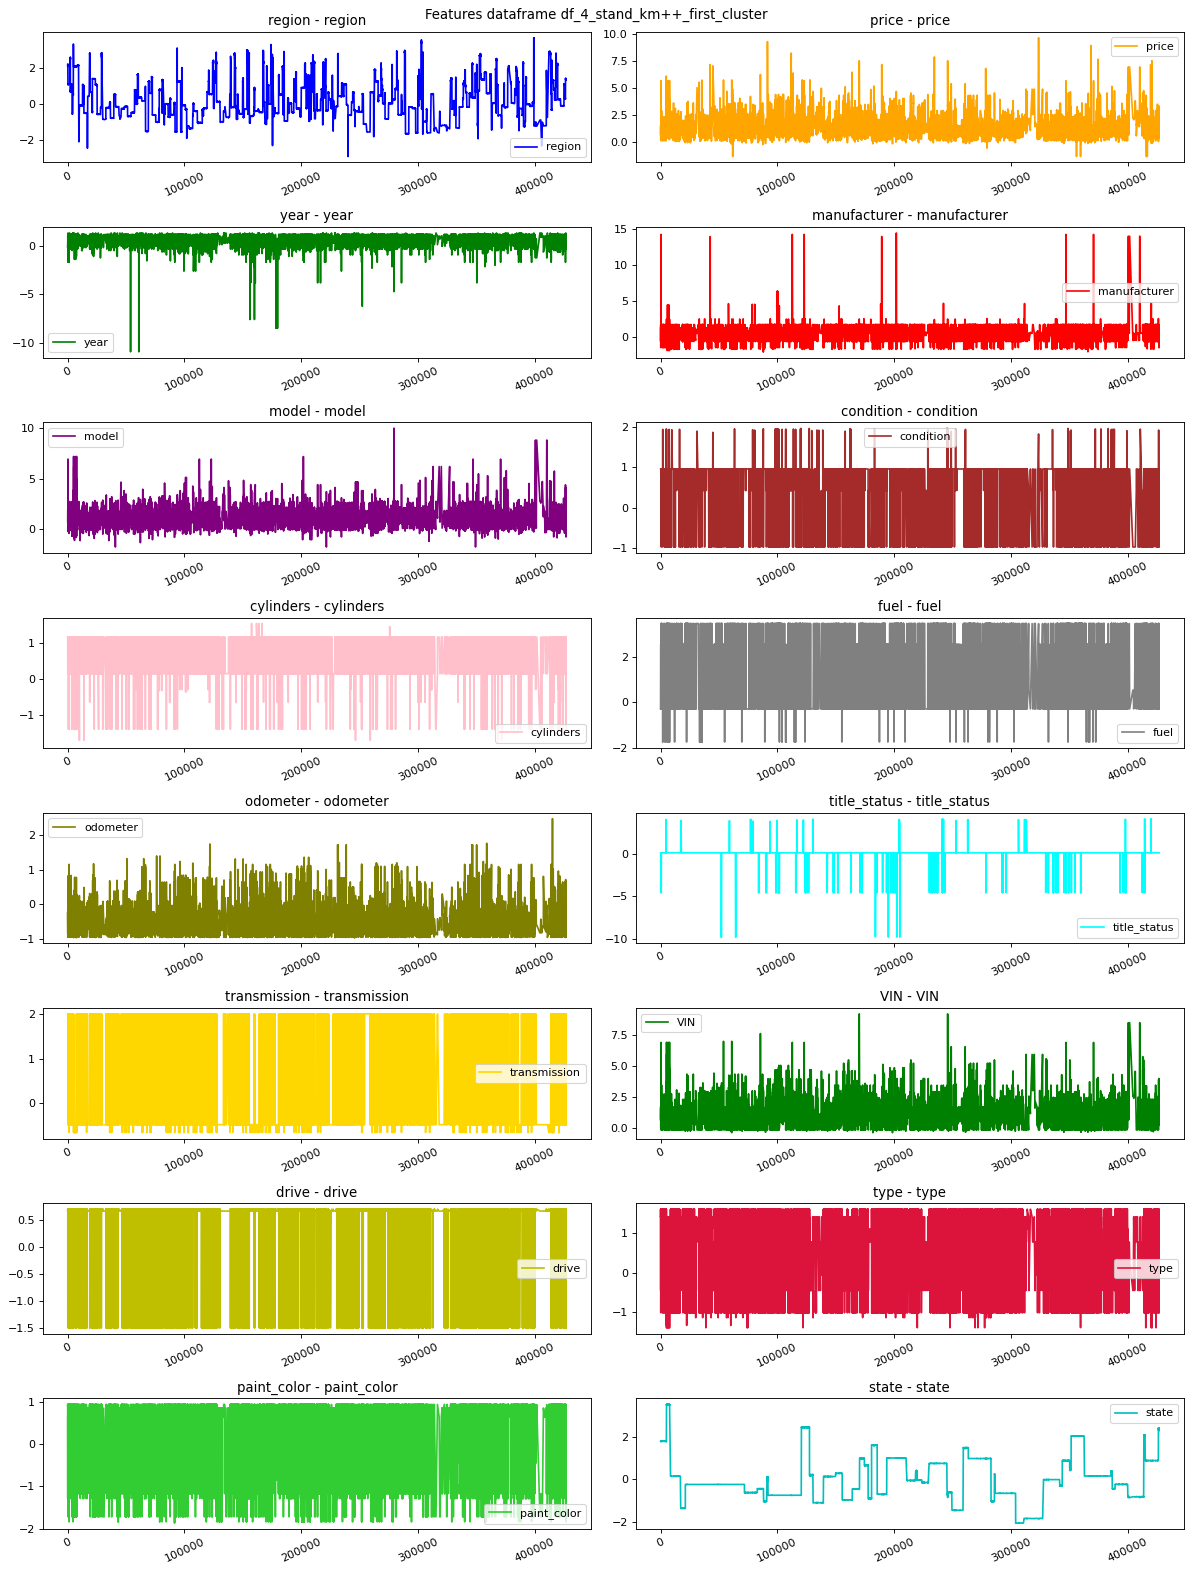

In [12]:
#plots of each feature of the di_df[0] 
#(dataframe with samples of df_4_standardized in cluster 0)
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=di_df[0],
    feature_keys=di_df[0].columns.tolist(),
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_cluster_0)



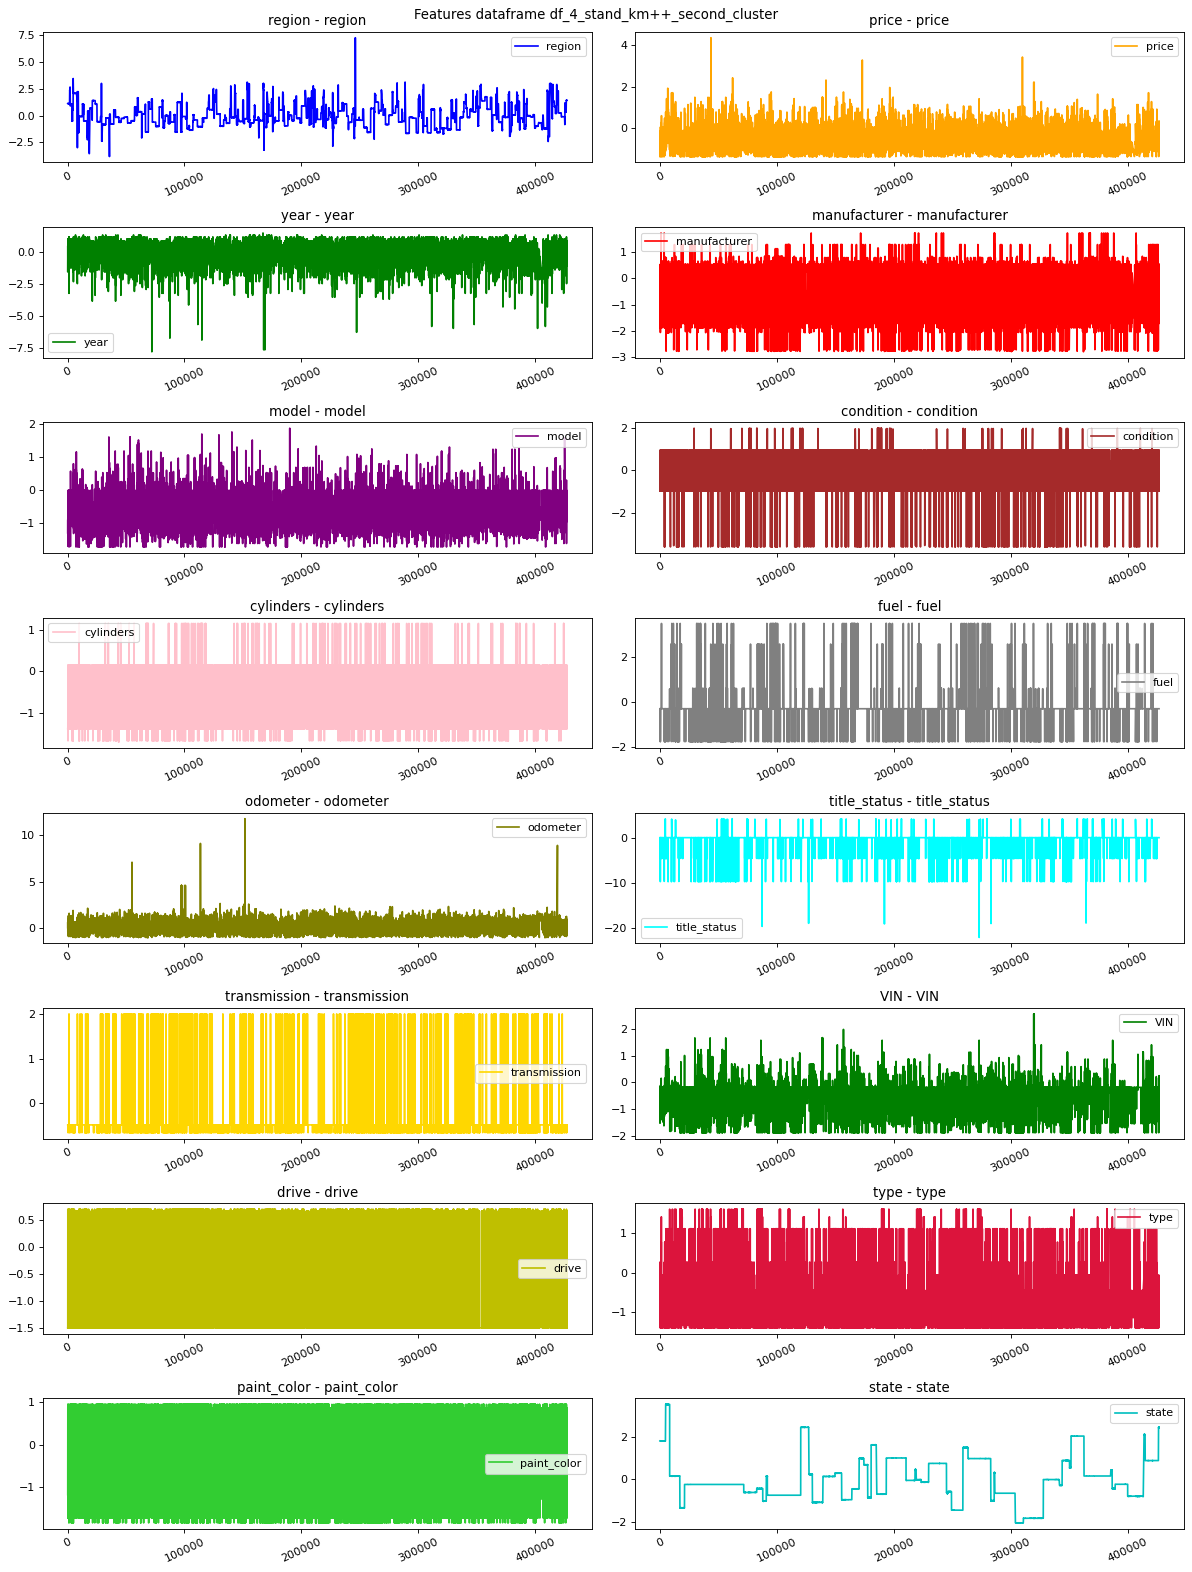

In [13]:
#plots of each feature of the di_df[1] (dataframe with samples in cluster 1)
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=di_df[1],
    feature_keys=di_df[1].columns.tolist(),
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_cluster_1)

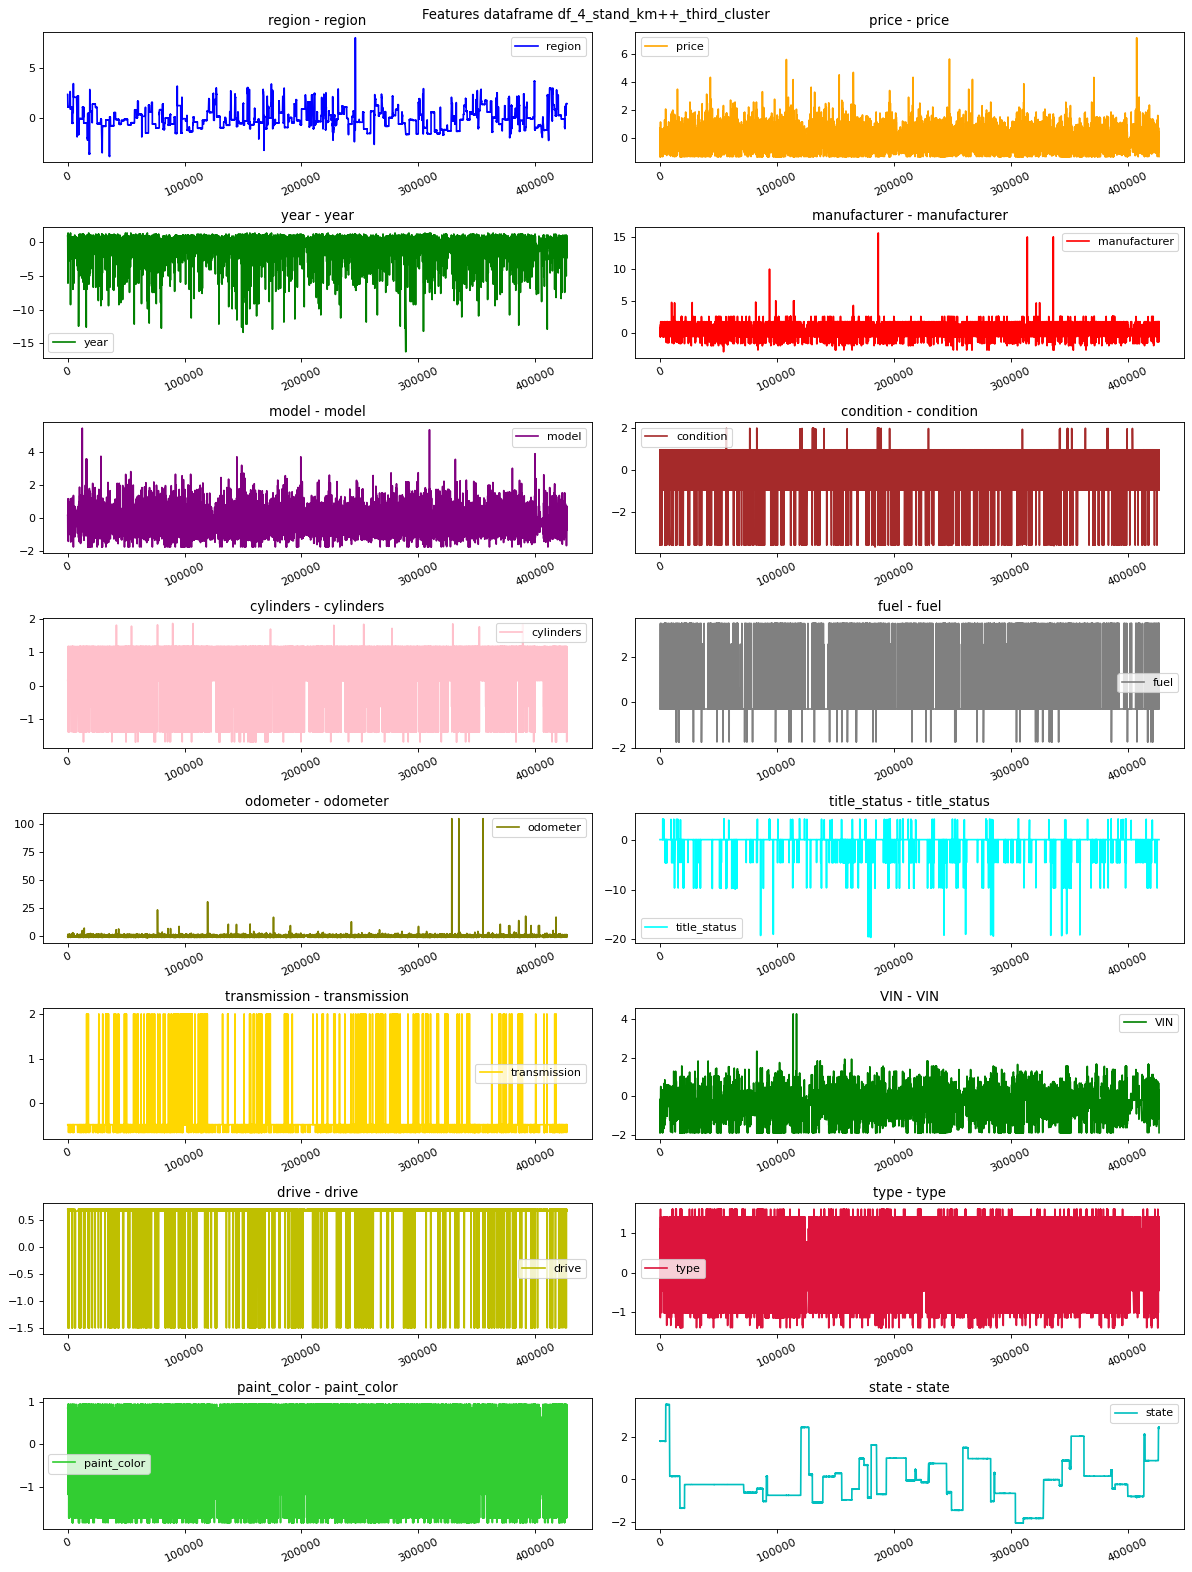

In [14]:
#plots of each feature of the di_df[2] (dataframe with samples in cluster 2)
cc_fi_fcts_data_treatment.fct_show_raw_visualization(
    data=di_df[2],
    feature_keys=di_df[2].columns.tolist(),
    titles=v_titles,
    colors=v_colors,\
    v_cols=v_cols_for_all_features_subplots,
    v_name_dataframe=val_name_dataframe_cluster_2)

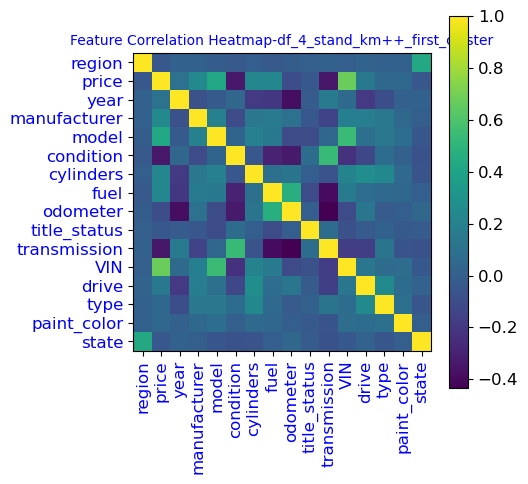

In [15]:
#plot of the feature heatmap for di_df[0] (dataframe with samples in cluster 0)
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=di_df[0],\
val_name_dataframe=val_name_dataframe_cluster_0)

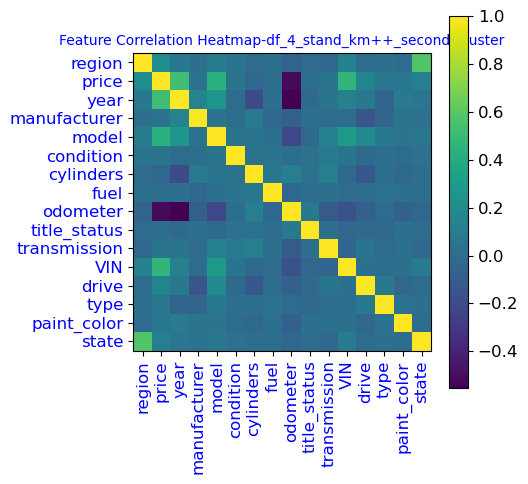

In [16]:
#plot of the feature heatmap for di_df[1] (dataframe with samples in cluster 1)
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=di_df[1],\
val_name_dataframe=val_name_dataframe_cluster_1)

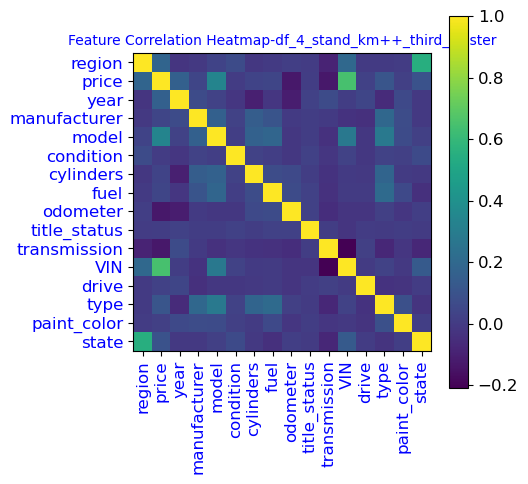

In [17]:
#plot of the feature heatmap for di_df[2] (dataframe with samples in cluster 2)
cc_fi_fcts_data_treatment.fct_show_feature_heatmap(\
data=di_df[2],\
val_name_dataframe=val_name_dataframe_cluster_2)

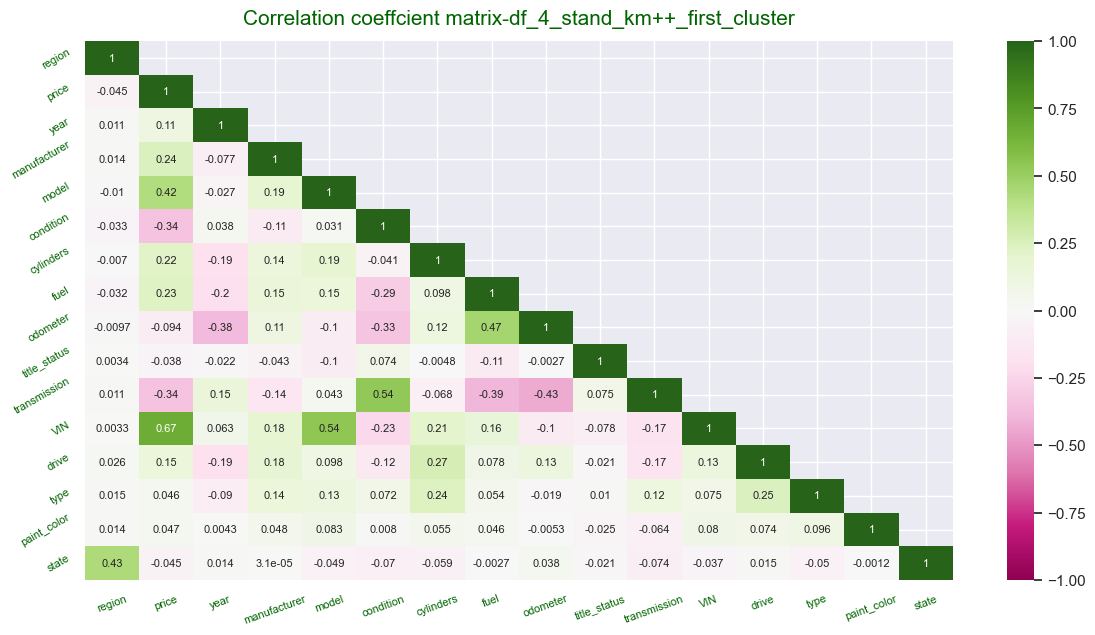

In [18]:
#plot of the correlation matrix for 
#di_df[0] (dataframe with samples in cluster 0)
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=di_df[0],\
val_name_dataframe=val_name_dataframe_cluster_0)

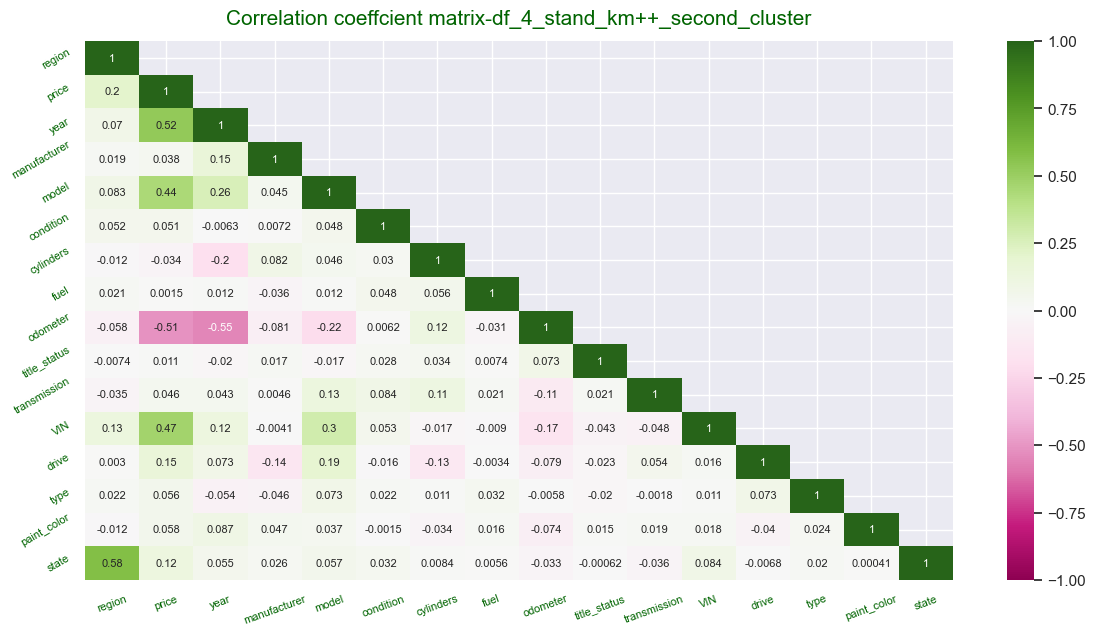

In [19]:
#plot of the correlation matrix for 
#di_df[1] (dataframe with samples in cluster 1)
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=di_df[1],\
val_name_dataframe=val_name_dataframe_cluster_1)

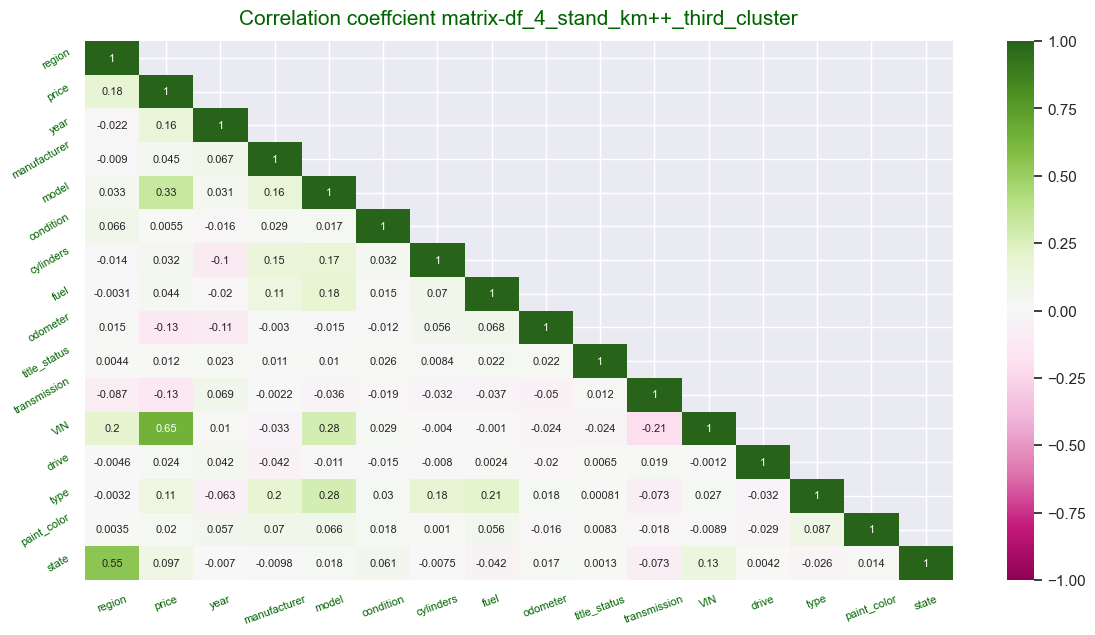

In [20]:
#plot of the correlation matrix for 
#di_df[0] (dataframe with samples in cluster 2)
cc_fi_fcts_data_treatment.fct_show_cor_coef_matrix(\
val_data=di_df[2],\
val_name_dataframe=val_name_dataframe_cluster_2)

In [ ]:
#Creation of the feature set and target set for
#dataframe di_df[0] 
#(dataframe with samples of df_4_stand in cluster 0)
X_0 = di_df[0].drop('price', axis = 1)
y_0 = di_df[0]['price']


#Creation of the feature set and target set for
#dataframe di_df[1] 
#(dataframe with samples of df_4_stand in cluster 1)
X_1 = di_df[1].drop('price', axis = 1)
y_1 = di_df[1]['price']

#Creation of the feature set and target set for
#dataframe di_df[2] 
#(dataframe with samples of df_4_stand in cluster 2)
X_2 = di_df[2].drop('price', axis = 1)
y_2 = di_df[2]['price']

# shuffle=True by default for train_test_split
#train, validation and test sets for di_df[0] 
#BECAUSE OF THE K-FOLD CV THE VALIDATION AND TEST SETS
#ARE NIT GOING TO BE USED. WE WILL CONSIDER THAT THE TRAIN
#SET IS THE ENTIRE SET THAT BECAUSE DUE TO COMPUTER LIMITATIONS
#THE IMPLEMENTATION IS VERY SLOW
X_train_0_a, X_test_0, y_train_0_a, y_test_0 =\
train_test_split(X_0, y_0, test_size=0.2, random_state=1)

X_train_0_b, X_val_0, y_train_0_b, y_val_0 =\
train_test_split(X_train_0_a, y_train_0_a, test_size=0.25, random_state=1)


# shuffle=True by default for train_test_split
#train, validation and test sets for di_df[1] 
X_train_1_a, X_test_1, y_train_1_a, y_test_1 =\
train_test_split(X_1, y_1, test_size=0.2, random_state=1)

X_train_1_b, X_val_1, y_train_1_b, y_val_1 =\
train_test_split(X_train_1_a, y_train_1_a, test_size=0.25, random_state=1)


## shuffle=True by default for train_test_split
#train, validation and test sets for di_df[2] 
#final train=X_train_2_b
#validation=X_val_2
X_train_2_a, X_test_2, y_train_2_a, y_test_2 =\
train_test_split(X_2, y_2, test_size=0.2, random_state=1)

X_train_2_b, X_val_2, y_train_2_b, y_val_2 =\
train_test_split(X_train_2_a, y_train_2_a, test_size=0.25, random_state=1)


### IT IS IMPORTANT TO NOTE THAT SINCEK-FOLD CROSS VALIDATION TECHNIQUE IS
### EMPLOYED THE ENTIRE DATASET SHOULD BE GIVEN TO THE GRIDSEARCHCV OBJECT
### DURING THE FIT PROCESS
### IN THE FOLLOWING IMPLEMENTATIONS THE TRAIN SET IS CONSIDERED
### AS THE ENTIRE SET AS THE IMPLEMENTATION TAKES TOO MUCH TIME
### WHEN THE MODEL IF FITTED IN THE ENTIRE SET

### For each of the three dataframes we will define the feature
### importance in decreasing order using multiple linear regression
### (use of multiple features) with potential use of  non linear features.
### Parabolic and non linear feature engineering techniques are employed to create 
### different models. The one with the best perfomance is obtained through
### gridsearchcv.

In [22]:
#pipeline with PolynomialFeatures feature creation 
#and Linear regression model
lin_regression_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', LinearRegression(n_jobs=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
ridge_pipe = Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),('model', Ridge(max_iter=10000000))])


#pipeline with PolynomialFeatures feature creation 
#and Ridge regression model
lasso_pipe=Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),\
('scaler', StandardScaler()),\
('model',Lasso(random_state=42,max_iter=10000000) )])


#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Linear regression model
lasso_feature_selector_with_LR_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l1', SelectFromModel(Lasso(random_state = 42,max_iter=10000000))),
('model', LinearRegression(n_jobs=10000000))])

#pipeline with PolynomialFeatures feature creation, 
#Lasso feature selector and Ridge regression model
lasso_feature_selector_with_Ridge_model_pipe=\
Pipeline([('poly_features', PolynomialFeatures(include_bias=False)),
('scaler', StandardScaler()),
('feature_selector_l2', SelectFromModel(Lasso(random_state=42,max_iter=10000000))),
('model', Ridge(max_iter=10000000))])



In [23]:
#the dictionary with the parameters for the linear regression pipeline
param_dict_lin_regression_pipe ={\
'estim':[lin_regression_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False]}

#the dictionary with the parameters for the Ridge pipeline
param_dict_ridge_pipe ={\
'estim':[ridge_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[0.05, 0.5,1,1.5,2.5,3,4,5,7,10,15,20,25,30,50,100,200,700]}
#[0.05,0.6,1,7,20,50]

##'estim__model__alpha':[0.02,0.45,0.6,1,3,5,7,20]

#the dictionary with the parameters for the lasso pipeline
param_dict_lasso_pipe={\
'estim':[lasso_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__model__fit_intercept':[True,False],
'estim__model__alpha':[0.05, 0.5,1,1.5,2.5,3,4,5,7,10,15,20,25,30,50,100,200,700]}
#[0.05,0.6,5]
#10 ok
#20 ok
#50 OK [1,2,3]

#the dictionary with the parameters for the Lasso and LR pipeline
param_dict_lasso_feat_select_lr_estim_pipe={\
'estim':[lasso_feature_selector_with_LR_model_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__feature_selector_l1__estimator__fit_intercept':[True,False],
'estim__feature_selector_l1__estimator__alpha':[0.005,0.004]}
                                            #,4,5,7,10,15,20,25,30,50,100,200,700]}
#[0.05,0.6,5]

##the dictionary with the parameters for the Lasso and Ridge pipeline
param_dict_lasso_feat_select_ridge_estim_pipe={\
'estim':[lasso_feature_selector_with_Ridge_model_pipe],\
'estim__poly_features__degree':[1,2,3],\
'estim__feature_selector_l2__estimator__fit_intercept':[True,False],\
'estim__feature_selector_l2__estimator__alpha':[0.005,0.004],\
#,4,5,7,10,15,20,25,30,50,100,200,700],\
'estim__model__alpha':[0.05, 0.5,1,1.5,2.5,3]}



In [24]:
pipeline = Pipeline([('estim', lin_regression_pipe)])

#list with the dictionaries with the. parameters 
#for each pipeline
params = [param_dict_lin_regression_pipe,\
param_dict_ridge_pipe,\
param_dict_lasso_pipe,\
param_dict_lasso_feat_select_lr_estim_pipe,\
param_dict_lasso_feat_select_ridge_estim_pipe]


#gridsearch object for fitting the first cluster  
gs_obj_df_0=GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')


#gridsearch object for fitting the second cluster 
gs_obj_df_1=GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')



#gridsearch object for fitting the third cluster 
gs_obj_df_2=GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')

In [25]:
#we use the train set to fit the gridsearch object so as to 
#where  the entire dataset should be used.
#as the train set involves a smaller number of samples
#implementations are accomplished faster (limited computer ressources)
#we consider that the train set is the entire set.

gs_obj_df_0.fit(X_train_0_a,y_train_0_a)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estim',
                                        Pipeline(steps=[('poly_features',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('model',
                                                         LinearRegression(n_jobs=10000000))]))]),
             param_grid=[{'estim': [Pipeline(steps=[('poly_features',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('scaler',
                                                     StandardScaler()),
                                                    ('model',
                                                     LinearRegressio...
                                                     SelectFromModel(estimator=Lasso(alpha=0.004,
                                                                                     max_iter=10000000,
                                                                                     random_state=42))),
                                                    ('model',
                                                     Ridge(alpha=3,
                                                           max_iter=10000000))])],
                          'estim__feature_selector_l2__estimator__alpha': [0.005,
                                                                           0.004],
                          'estim__feature_selector_l2__estimator__fit_intercept': [True,
                                                                                   False],
                          'estim__model__alpha': [0.05, 0.5, 1, 1.5, 2.5, 3],
                          'estim__poly_features__degree': [1, 2, 3]}],
             scoring='neg_mean_squared_error')

In [26]:
#the best parameters
gs_obj_df_0.best_params_

{'estim': Pipeline(steps=[('poly_features',
                  PolynomialFeatures(degree=3, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('feature_selector_l2',
                  SelectFromModel(estimator=Lasso(alpha=0.004, max_iter=10000000,
                                                  random_state=42))),
                 ('model', Ridge(alpha=3, max_iter=10000000))]),
 'estim__feature_selector_l2__estimator__alpha': 0.004,
 'estim__feature_selector_l2__estimator__fit_intercept': True,
 'estim__model__alpha': 3,
 'estim__poly_features__degree': 3}

In [28]:
#REMARK CASE 
#******PIPELINE lasso_feature_selector_with_Ridge_model_pipe WHEN TRIED ALONE
#we observe that param \alpha for Lasso used as estimator
#is the smallest value which is in acord with the case that 
#when candidates \alphas are too large no feature is selected.

#gs_obj_df_0.best_params_ RESULTS TO 
#{'estim': Pipeline(steps=[('poly_features',
#                  PolynomialFeatures(degree=3, include_bias=False)),
#                 ('scaler', StandardScaler()),
#                 ('feature_selector_l2',
#                  SelectFromModel(estimator=Lasso(alpha=0.004, max_iter=10000000,
#                                                  random_state=42))),
#                 ('model', Ridge(alpha=3, max_iter=10000000))]),
# 'estim__feature_selector_l2__estimator__alpha': 0.004,
# 'estim__feature_selector_l2__estimator__fit_intercept': True,
# 'estim__model__alpha': 3,
# 'estim__poly_features__degree': 3}
#****************************************

#SIMILAR OBSERVATION FOR PIPELINE lasso_feature_selector_with_LR_model_pipe
#gs_obj_df_0.best_params_
#{'estim': Pipeline(steps=[('poly_features',
#                  PolynomialFeatures(degree=3, include_bias=False)),
#                 ('scaler', StandardScaler()),
#                 ('feature_selector_l1',
#                  SelectFromModel(estimator=Lasso(alpha=0.004, max_iter=10000000,
#                                                  random_state=42))),
#                 ('model', LinearRegression(n_jobs=10000000))]),
# 'estim__feature_selector_l1__estimator__alpha': 0.004,
# 'estim__feature_selector_l1__estimator__fit_intercept': True,
# 'estim__poly_features__degree': 3}

#gs_obj_df_0.best_params_

In [29]:
#we use the train set to fit the gridsearch object so as to 
#verify the predictions (if we are interested in) in the test set.
#however, as here we are interested in the most important features 
#we could have used the entire dataset

gs_obj_df_1.fit(X_train_1_a,y_train_1_a)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estim',
                                        Pipeline(steps=[('poly_features',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('model',
                                                         LinearRegression(n_jobs=10000000))]))]),
             param_grid=[{'estim': [Pipeline(steps=[('poly_features',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('scaler',
                                                     StandardScaler()),
                                                    ('model',
                                                     LinearRegressio...
                                                     SelectFromModel(estimator=Lasso(alpha=0.004,
                                                                                     max_iter=10000000,
                                                                                     random_state=42))),
                                                    ('model',
                                                     Ridge(alpha=3,
                                                           max_iter=10000000))])],
                          'estim__feature_selector_l2__estimator__alpha': [0.005,
                                                                           0.004],
                          'estim__feature_selector_l2__estimator__fit_intercept': [True,
                                                                                   False],
                          'estim__model__alpha': [0.05, 0.5, 1, 1.5, 2.5, 3],
                          'estim__poly_features__degree': [1, 2, 3]}],
             scoring='neg_mean_squared_error')

In [30]:
#the best. parameters
gs_obj_df_1.best_params_

{'estim': Pipeline(steps=[('poly_features',
                  PolynomialFeatures(degree=3, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('feature_selector_l2',
                  SelectFromModel(estimator=Lasso(alpha=0.004, max_iter=10000000,
                                                  random_state=42))),
                 ('model', Ridge(alpha=3, max_iter=10000000))]),
 'estim__feature_selector_l2__estimator__alpha': 0.004,
 'estim__feature_selector_l2__estimator__fit_intercept': True,
 'estim__model__alpha': 3,
 'estim__poly_features__degree': 3}

In [31]:
#we use the train set to fit the gridsearch object so as to 
#verify the predictions (if we are interested in) in the test set.
#however, as here we are interested in the most important features 
#we could have used the entire dataset

gs_obj_df_2.fit(X_train_2_a,y_train_2_a)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estim',
                                        Pipeline(steps=[('poly_features',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('scaler',
                                                         StandardScaler()),
                                                        ('model',
                                                         LinearRegression(n_jobs=10000000))]))]),
             param_grid=[{'estim': [Pipeline(steps=[('poly_features',
                                                     PolynomialFeatures(include_bias=False)),
                                                    ('scaler',
                                                     StandardScaler()),
                                                    ('model',
                                                     LinearRegressio...
                                                     SelectFromModel(estimator=Lasso(alpha=0.004,
                                                                                     max_iter=10000000,
                                                                                     random_state=42))),
                                                    ('model',
                                                     Ridge(alpha=3,
                                                           max_iter=10000000))])],
                          'estim__feature_selector_l2__estimator__alpha': [0.005,
                                                                           0.004],
                          'estim__feature_selector_l2__estimator__fit_intercept': [True,
                                                                                   False],
                          'estim__model__alpha': [0.05, 0.5, 1, 1.5, 2.5, 3],
                          'estim__poly_features__degree': [1, 2, 3]}],
             scoring='neg_mean_squared_error')

In [32]:
gs_obj_df_2.best_params_

{'estim': Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', Ridge(alpha=200, max_iter=10000000))]),
 'estim__model__alpha': 200,
 'estim__model__fit_intercept': True,
 'estim__poly_features__degree': 2}

In [45]:
#save in memory the greidsearch object resulting from df[0]
with open("gs_obj_df_0.pkl", 'wb') as fp0:
    pickle.dump(gs_obj_df_0,fp0)
    

In [46]:
#save in memory the greidsearch object resulting from df[1]
with open("gs_obj_df_1.pkl", 'wb') as fp1:
    pickle.dump(gs_obj_df_1,fp1)

In [47]:
#save in memory the greidsearch object resulting from df[0]
with open("gs_obj_df_2.pkl", 'wb') as fp2:
    pickle.dump(gs_obj_df_2,fp2)

In [37]:
#import sys
#sys.exit()
#####OK1

In [38]:
#the best parameters for the gs_obj_df_2
gs_obj_df_2.best_params_

{'estim': Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', Ridge(alpha=200, max_iter=10000000))]),
 'estim__model__alpha': 200,
 'estim__model__fit_intercept': True,
 'estim__poly_features__degree': 2}

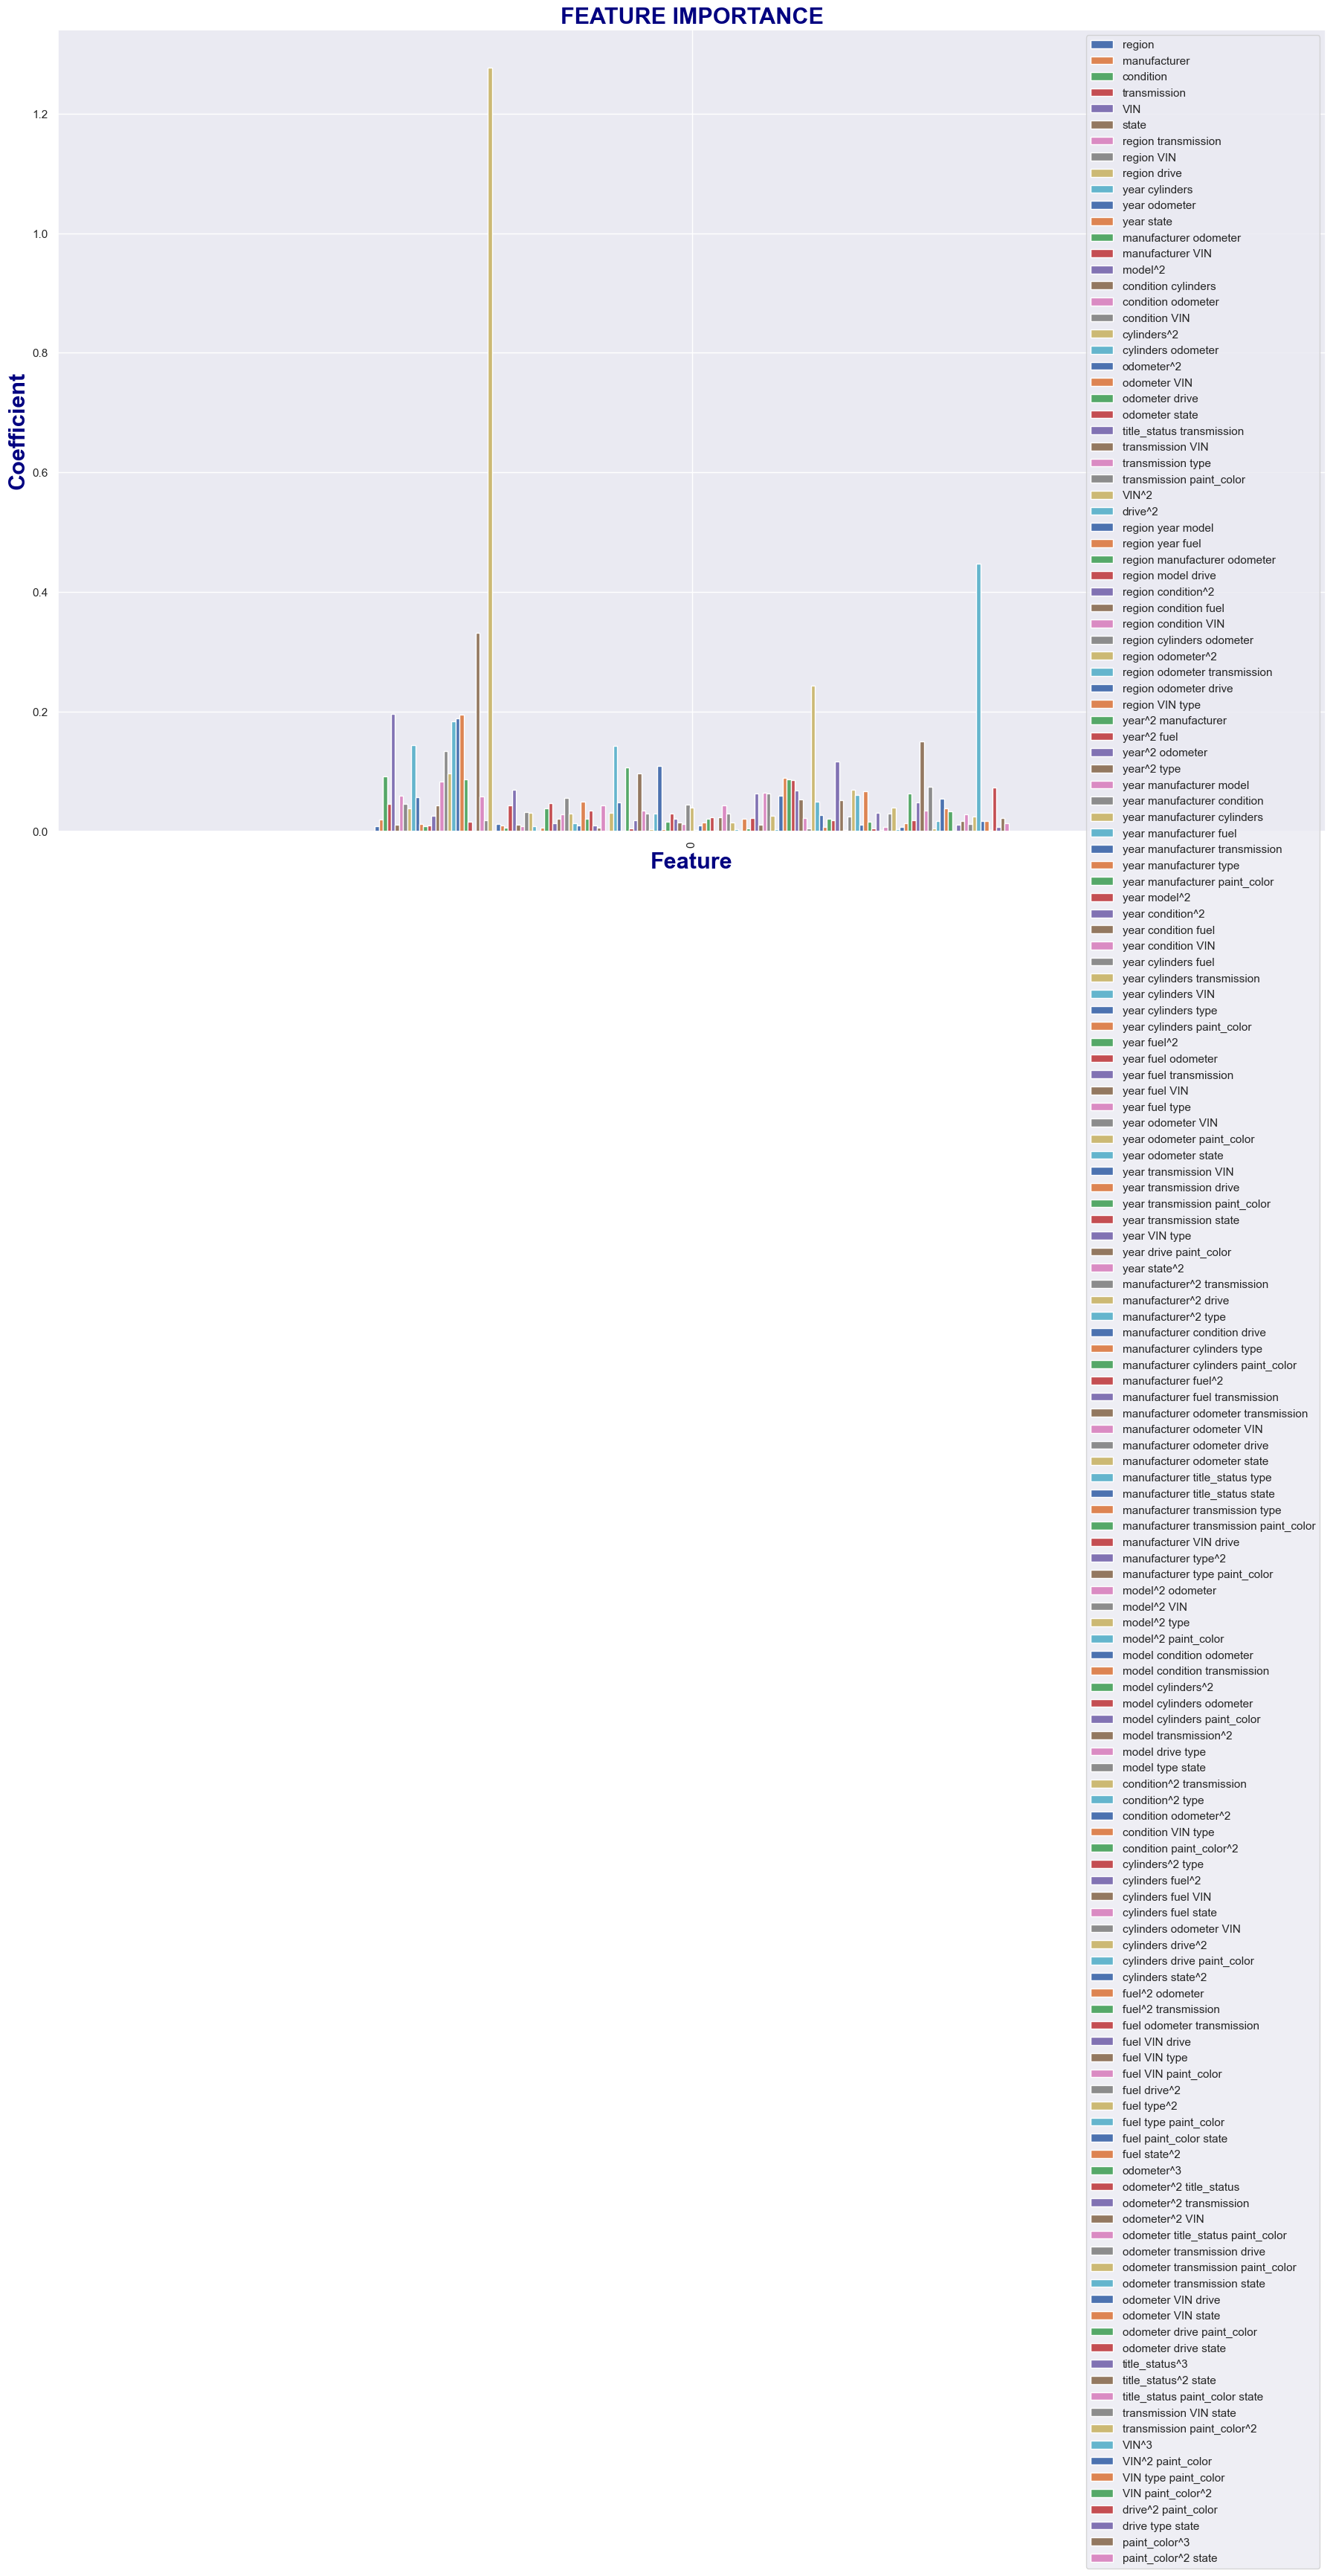

In [39]:
#we plot of the feature importance for gs_obj_df_0
#and return the dictionaries 
#with the coefficients 
#(one with the absolute value of the coefficients
#the other with the real values)
#both in decreasing order

df1_abs_sorted_df_0, df1_sorted_df_0=\
cc_fi_fcts_data_treatment.\
fct_plot_and_treat_LR_or_Ridge_results_when_lasso_feature_selector(\
val_fit_gridsearchcv_obj=gs_obj_df_0,\
val_name_feature_selector_lasso='feature_selector_l2',                                                                            
val_title_fig="FEATURE IMPORTANCE",\
val_xlabel_fig="Feature",\
val_ylabel_fig="Coefficient",\
val_round=4)

In [40]:
#the dataframe with the absolute value of the coefficients 
#in descending order
#of each feature, for the gridsearchcv object gs_obj_df_0
df1_abs_sorted_df_0

,VIN^2,VIN^3,transmission VIN,condition^2 transmission,VIN,odometer VIN,odometer^2,cylinders odometer,odometer^2 VIN,year cylinders,...,cylinders fuel state,fuel VIN type,region odometer drive,drive^2,manufacturer title_status state,manufacturer fuel transmission,odometer drive state,title_status transmission,year cylinders paint_color,year cylinders fuel
0,1.27643,0.447296,0.331657,0.243504,0.195726,0.194735,0.188757,0.183483,0.150133,0.143568,...,0.001935,0.001847,0.00117,0.000991,0.000882,0.000777,0.00043,0.000306,0.000176,0.000003


In [58]:
#the dimensions of the feature space
df1_abs_sorted_df_0.shape

(1, 157)

In [87]:
df1_abs_sorted_df_0.columns

Index(['VIN^2', 'VIN^3', 'transmission VIN', 'condition^2 transmission', 'VIN',
       'odometer VIN', 'odometer^2', 'cylinders odometer', 'odometer^2 VIN',
       'year cylinders',
       ...
       'cylinders fuel state', 'fuel VIN type', 'region odometer drive',
       'drive^2', 'manufacturer title_status state',
       'manufacturer fuel transmission', 'odometer drive state',
       'title_status transmission', 'year cylinders paint_color',
       'year cylinders fuel'],
      dtype='object', length=157)

In [41]:
#the dataframe with the coefficients 
#in descending order
#of each feature, for the gridsearchcv object gs_obj_df_0
df1_sorted_df_0

,VIN^2,transmission VIN,odometer VIN,odometer^2,year cylinders,condition VIN,cylinders fuel^2,year fuel^2,cylinders^2,model condition transmission,...,odometer drive,condition,year fuel VIN,year transmission VIN,year cylinders VIN,odometer^2 VIN,cylinders odometer,VIN,condition^2 transmission,VIN^3
0,1.27643,0.331657,0.194735,0.188757,0.143568,0.134682,0.116548,0.106907,0.09625,0.088771,...,-0.087067,-0.091721,-0.096593,-0.109533,-0.143349,-0.150133,-0.183483,-0.195726,-0.243504,-0.447296


In [42]:
#we save in memory the df1_abs_sorted_df_0,df1_sorted_df_0

with open("df1_abs_sorted_df_0.pkl", 'wb') as fp1:
    pickle.dump(df1_abs_sorted_df_0,fp1)
    
with open("df1_sorted_df_0.pkl", 'wb') as fp2:
    pickle.dump(df1_sorted_df_0,fp2)

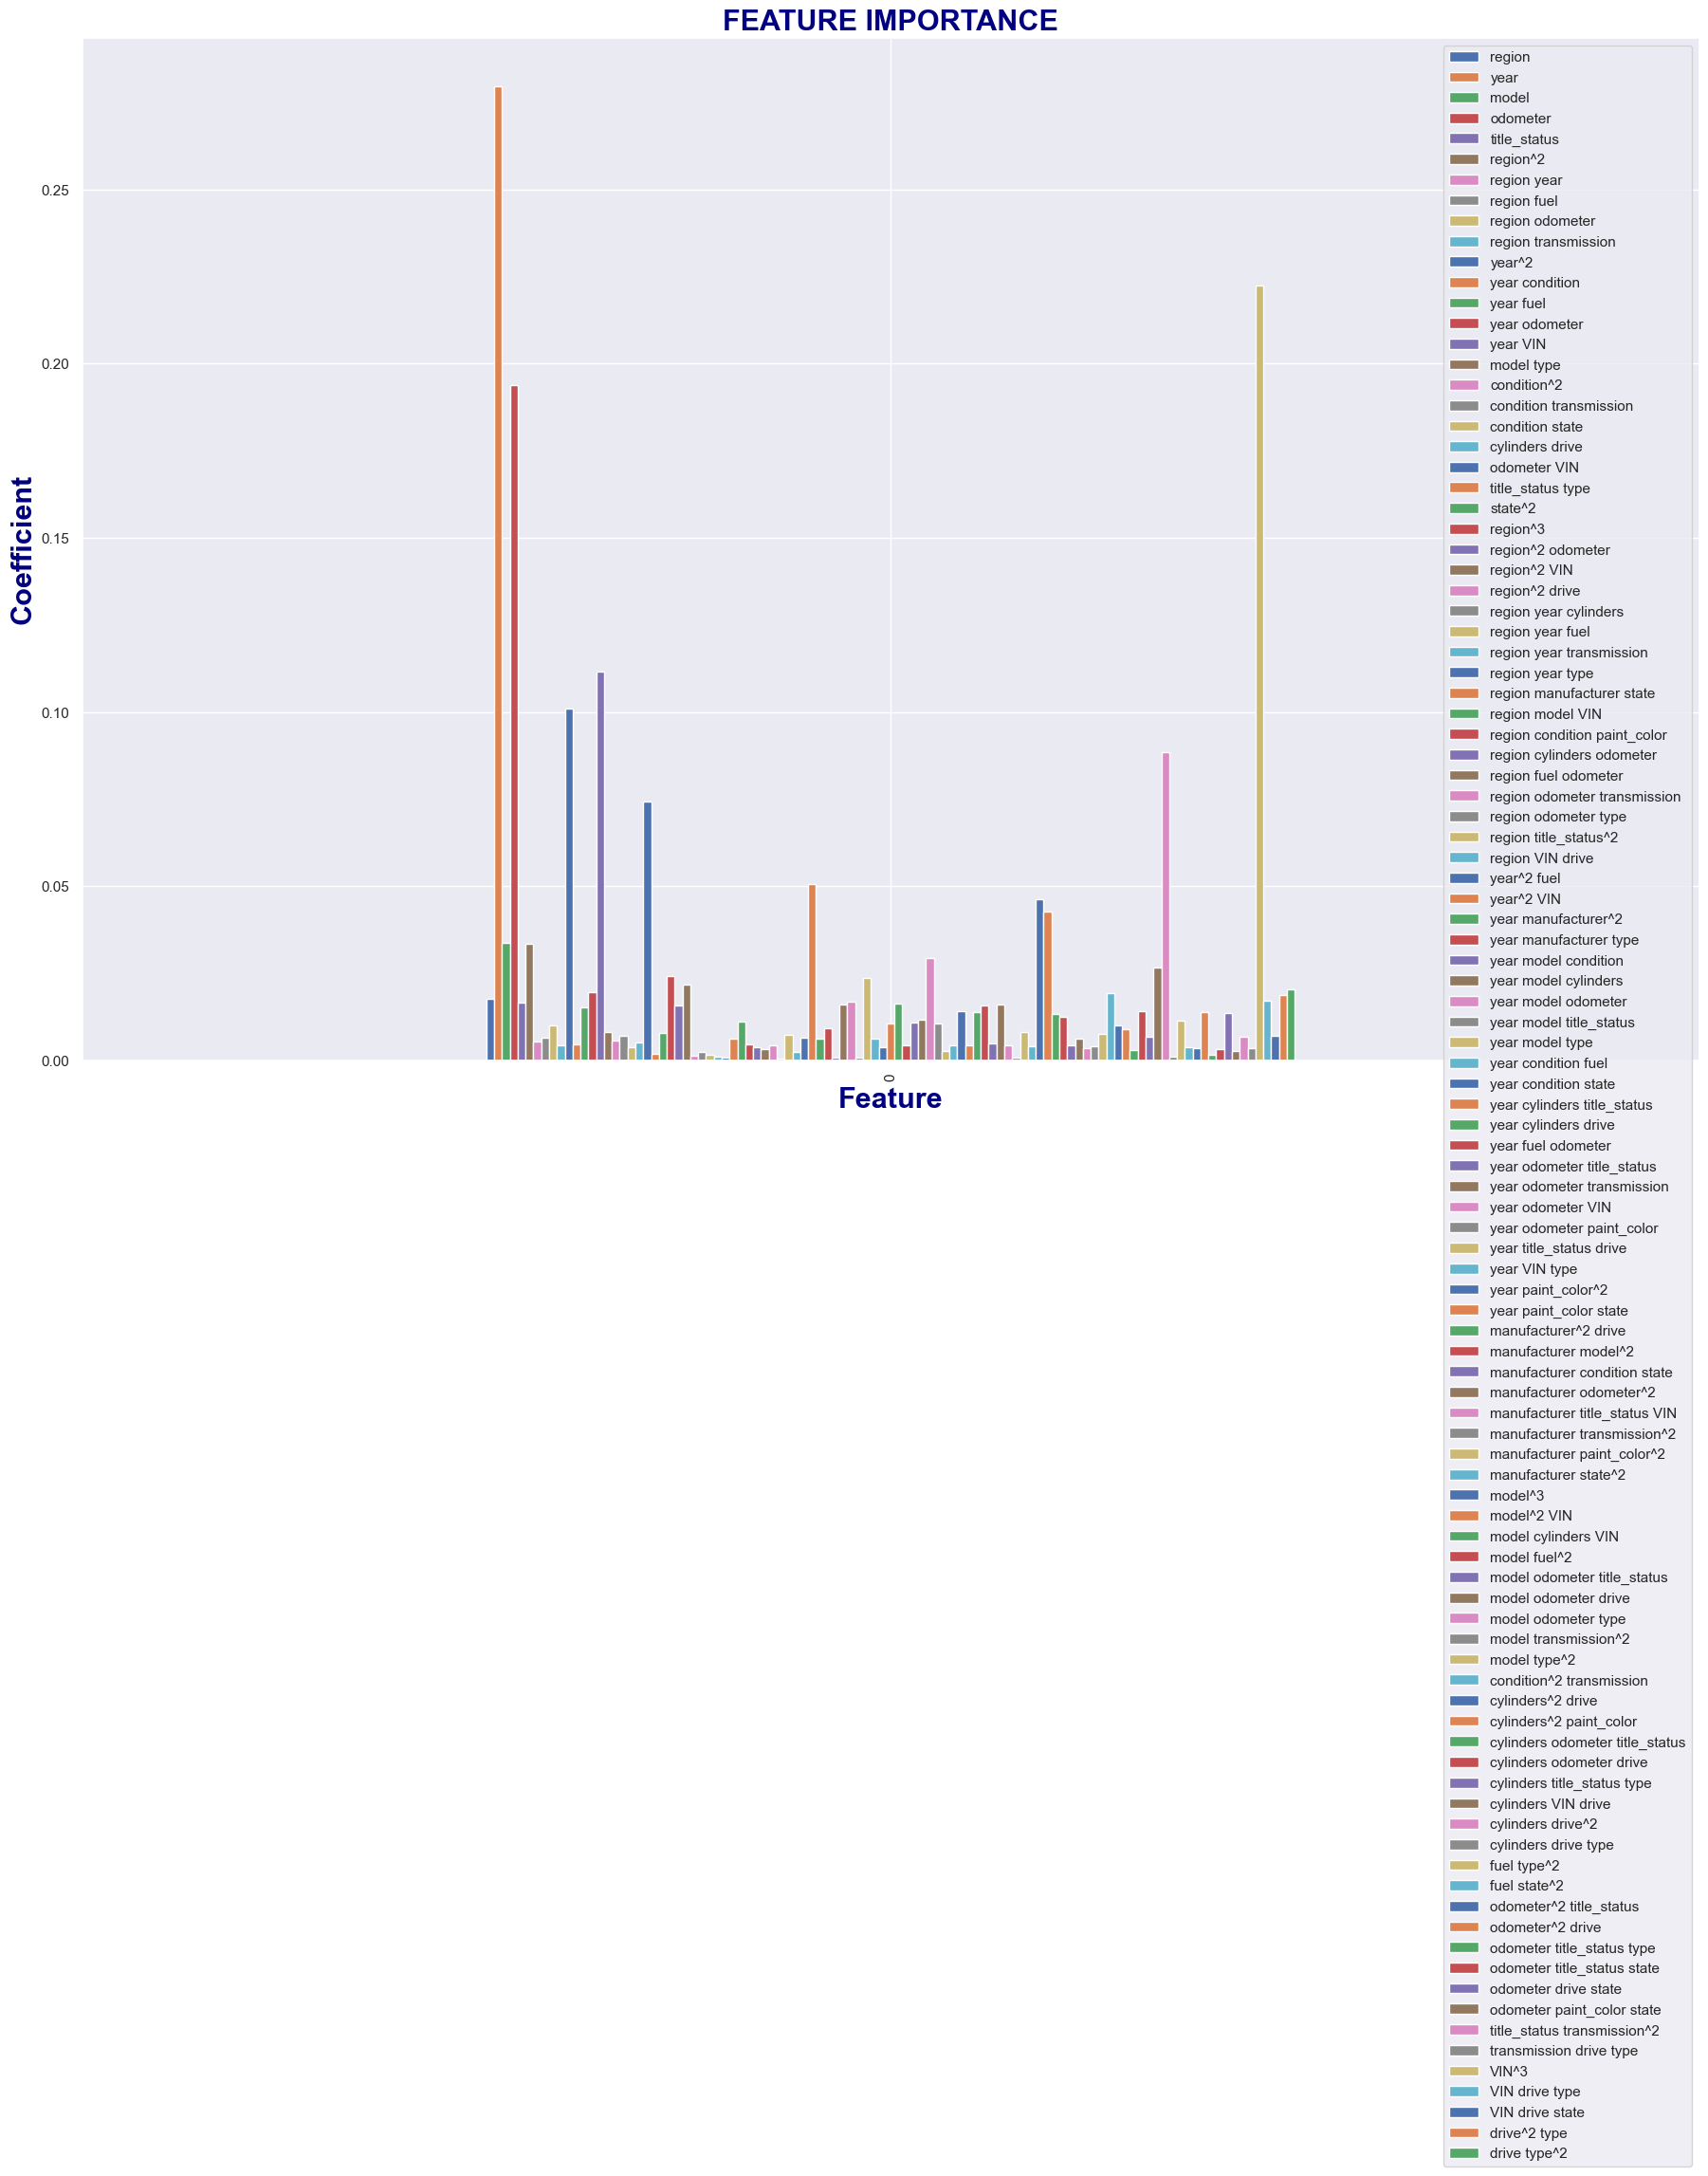

In [43]:
#we plot of the feature importance for gs_obj_df_1
#and return the dictionaries 
#with the coefficients 
#(one with the absolute valu of the coefficients
#the other with the real values)
#both in decreasing order


#cc_fi_fcts_data_treatment.\
df_abs_sorted_gs_1,df_sorted_gs_1=\
cc_fi_fcts_data_treatment.\
fct_plot_and_treat_LR_or_Ridge_results_when_lasso_feature_selector(\
val_fit_gridsearchcv_obj=gs_obj_df_1,\
val_name_feature_selector_lasso='feature_selector_l2',                                                                            
val_title_fig="FEATURE IMPORTANCE",\
val_xlabel_fig="Feature",\
val_ylabel_fig="Coefficient",\
val_round=4)

In [50]:
#the dataframe with the absolute values of the coefficients 
#in descending order
#of each feature, for the gridsearchcv object gs_obj_df_1
df_abs_sorted_gs_1

,year,VIN^3,odometer,year VIN,year^2,cylinders drive^2,odometer VIN,year^2 VIN,model^3,model^2 VIN,...,region year fuel,odometer title_status type,region^2 drive,region year transmission,cylinders drive type,year model title_status,region year type,manufacturer transmission^2,year model condition,region odometer type
0,0.279559,0.222507,0.193969,0.111483,0.100907,0.088599,0.074216,0.050719,0.046125,0.042811,...,0.001713,0.001537,0.001398,0.00101,0.000942,0.000896,0.000891,0.000858,0.000669,0.000525


In [86]:
df_abs_sorted_gs_1.columns

Index(['year', 'VIN^3', 'odometer', 'year VIN', 'year^2', 'cylinders drive^2',
       'odometer VIN', 'year^2 VIN', 'model^3', 'model^2 VIN',
       ...
       'region year fuel', 'odometer title_status type', 'region^2 drive',
       'region year transmission', 'cylinders drive type',
       'year model title_status', 'region year type',
       'manufacturer transmission^2', 'year model condition',
       'region odometer type'],
      dtype='object', length=103)

In [51]:
#the dataframe with the coefficients 
#in descending order
#of each feature, for the gridsearchcv object gs_obj_df_1
df_sorted_gs_1

,year,VIN^3,year VIN,year^2,cylinders drive^2,year^2 VIN,model^3,model,region^3,drive type^2,...,VIN drive type,year odometer,region^2 VIN,year model type,cylinders VIN drive,year odometer VIN,region^2,model^2 VIN,odometer VIN,odometer
0,0.279559,0.222507,0.111483,0.100907,0.088599,0.050719,0.046125,0.033714,0.024129,0.020309,...,-0.017027,-0.019562,-0.021708,-0.02375,-0.026781,-0.02924,-0.033446,-0.042811,-0.074216,-0.193969


In [52]:
#we save in memory the df1_abs_sorted_df_1,df1_sorted_df_1

with open("df_abs_sorted_gs_1.pkl", 'wb') as fp3:
    pickle.dump(df_abs_sorted_gs_1,fp3)
    
with open("df_sorted_gs_1.pkl", 'wb') as fp4:
    pickle.dump(df_sorted_gs_1,fp4)

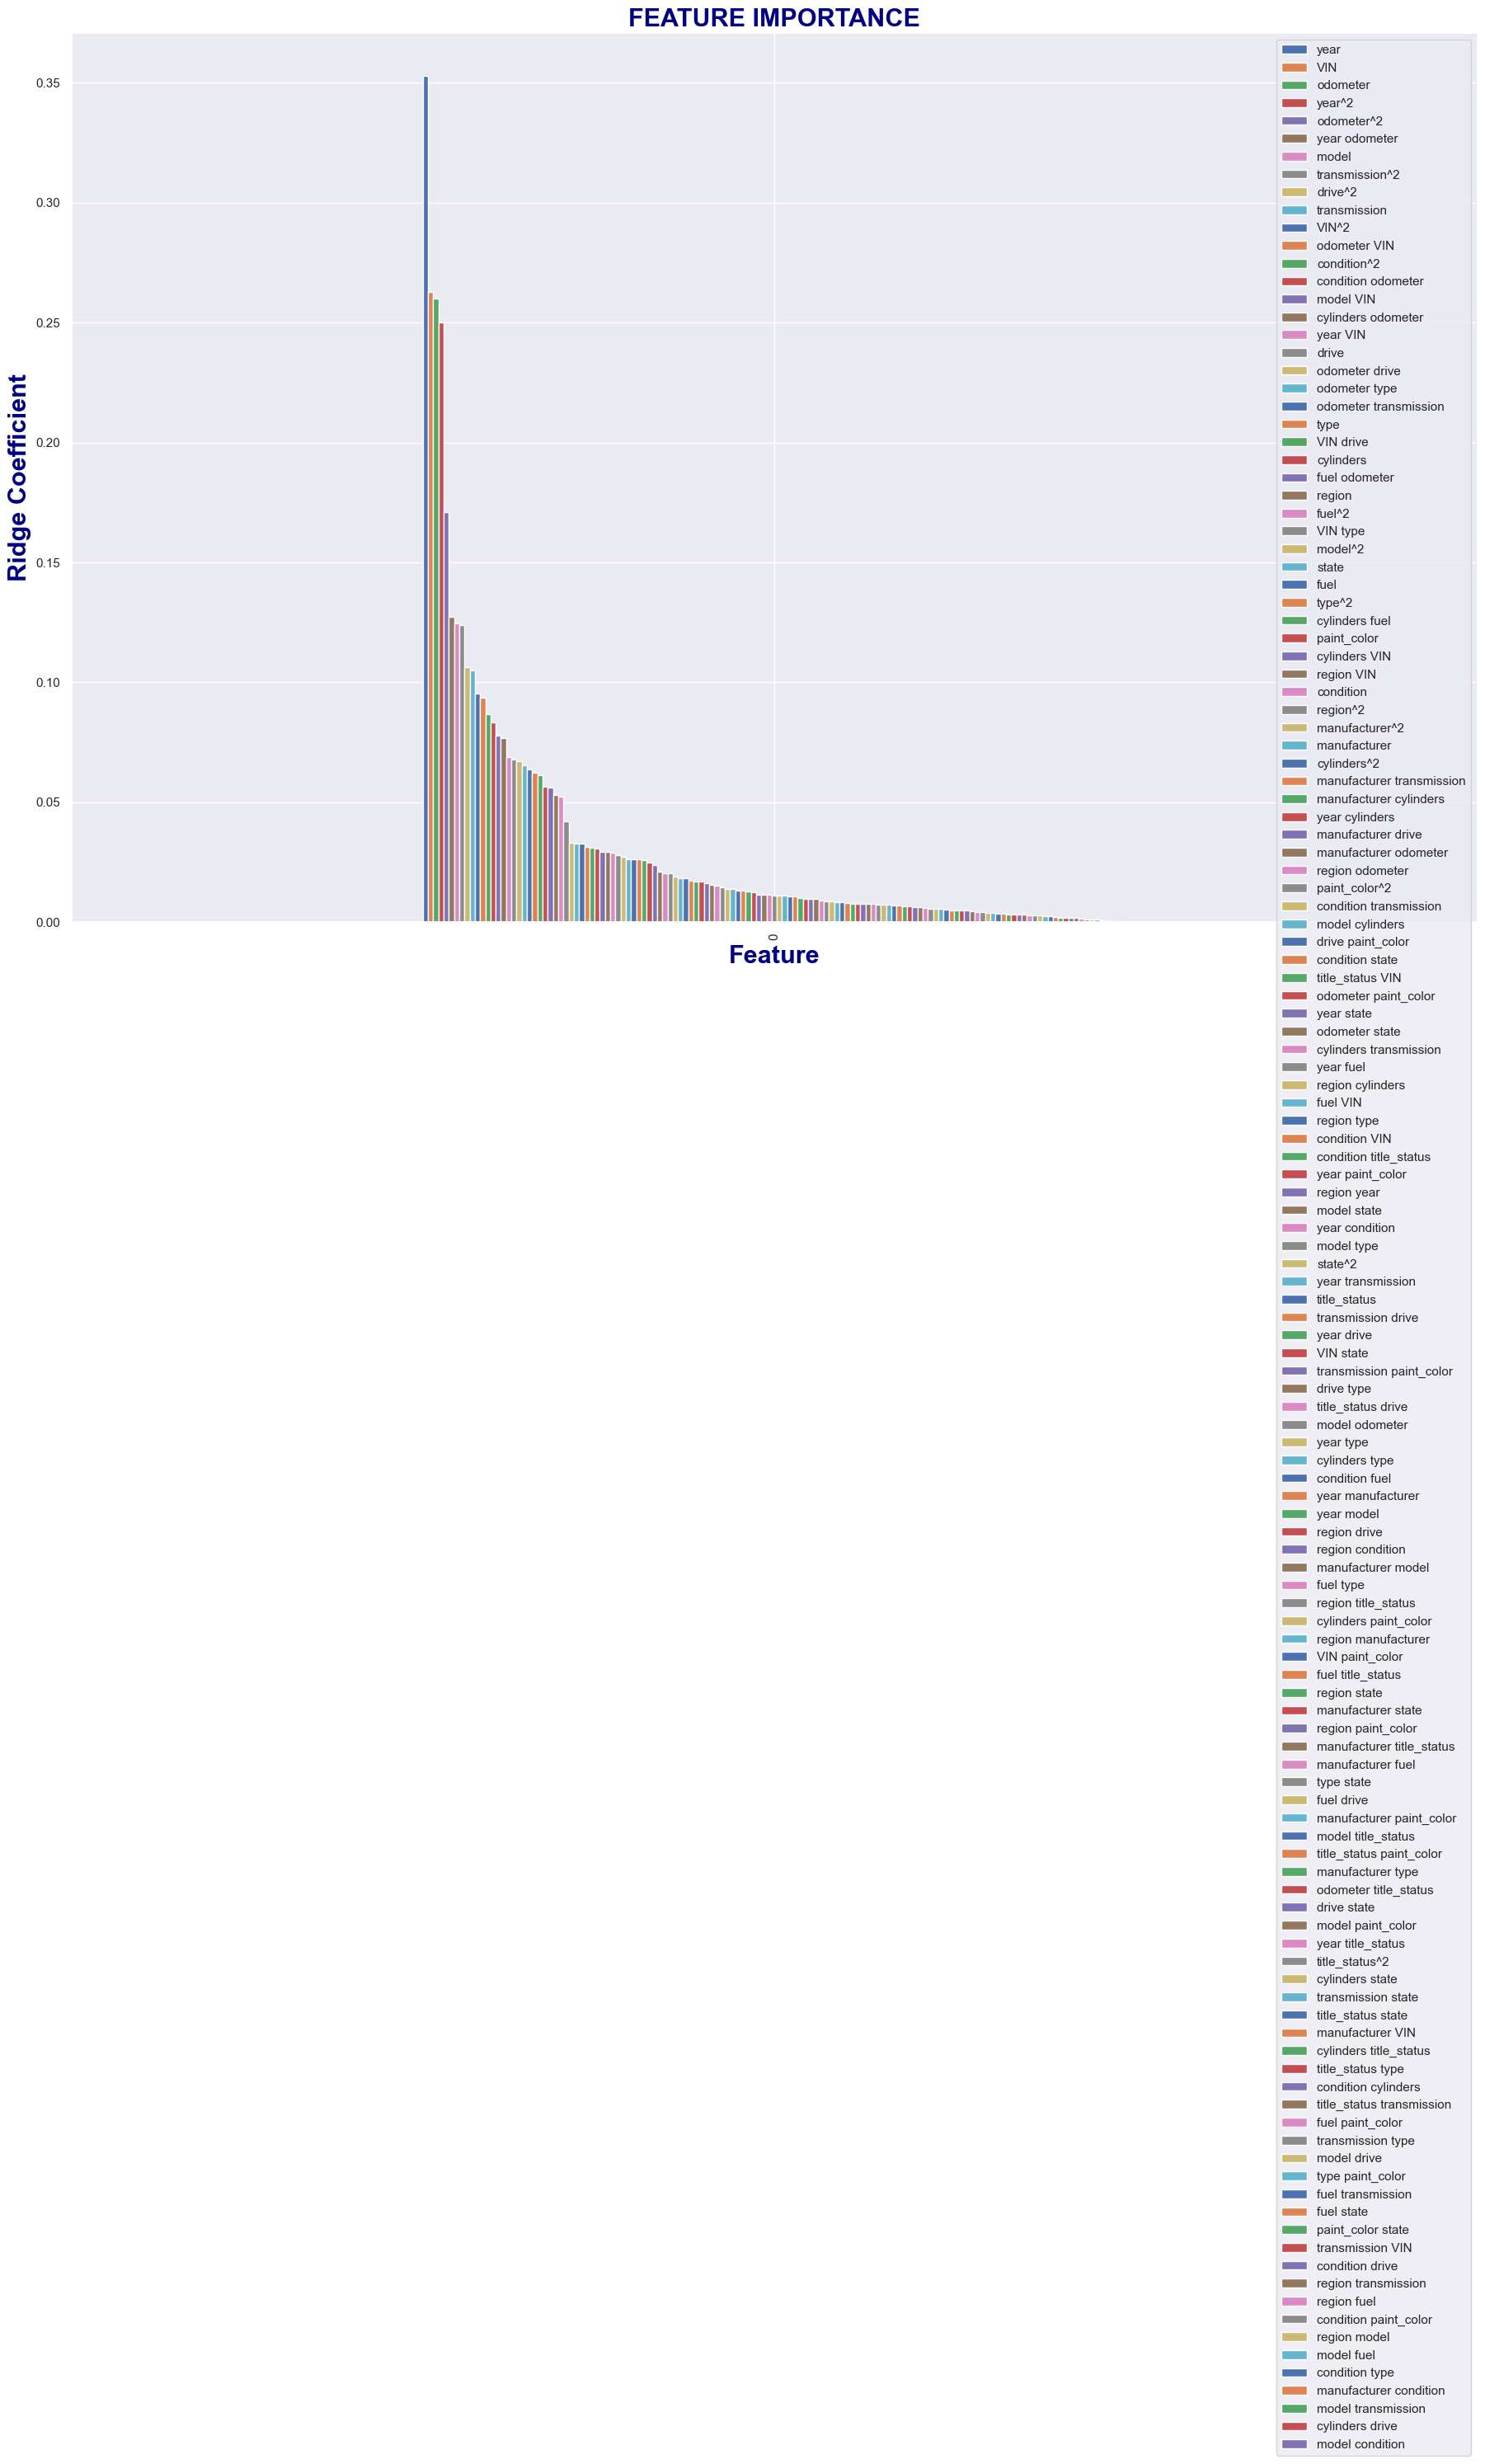

In [54]:
df1_abs_sorted_df_2,df1_sorted_df_2=\
cc_fi_fcts_data_treatment.\
fct_plot_and_treat_coefficients_model_without_feature_selection(\
val_gridsearchcv_fit_object=gs_obj_df_2,\
val_step_model="model",\
val_title_fig="FEATURE IMPORTANCE",\
val_xlabel_fig="Feature",\
val_ylabel_fig="Ridge Coefficient")

In [55]:
#the dict with the sorted absolute values of the 
#coefficients in descending order for
#gridsearch object gs_obj_df_2
df1_abs_sorted_df_2

,year,VIN,odometer,year^2,odometer^2,year odometer,model,transmission^2,drive^2,transmission,...,region transmission,region fuel,condition paint_color,region model,model fuel,condition type,manufacturer condition,model transmission,cylinders drive,model condition
0,0.353015,0.262634,0.260025,0.249931,0.171064,0.127199,0.124634,0.123914,0.106177,0.104919,...,0.001699,0.001324,0.001231,0.00115,0.001091,0.000874,0.000487,0.000432,0.000114,0.000028


In [88]:
df1_abs_sorted_df_2.columns

Index(['year', 'VIN', 'odometer', 'year^2', 'odometer^2', 'year odometer',
       'model', 'transmission^2', 'drive^2', 'transmission',
       ...
       'region transmission', 'region fuel', 'condition paint_color',
       'region model', 'model fuel', 'condition type',
       'manufacturer condition', 'model transmission', 'cylinders drive',
       'model condition'],
      dtype='object', length=135)

In [56]:
#the dict with the sorted  values of the 
#coefficients in descending order for
#gridsearch object gs_obj_df_2
df1_sorted_df_2

,year,VIN,year^2,odometer^2,model,transmission^2,model VIN,year VIN,odometer type,odometer transmission,...,drive,cylinders odometer,condition odometer,condition^2,odometer VIN,VIN^2,transmission,drive^2,year odometer,odometer
0,0.353015,0.262634,0.249931,0.171064,0.124634,0.123914,0.077676,0.06875,0.065387,0.063632,...,-0.067695,-0.07673,-0.083396,-0.086589,-0.093415,-0.095395,-0.104919,-0.106177,-0.127199,-0.260025


In [57]:
#we save in memory the df1_abs_sorted_df_2,df1_sorted_df_2

with open("df1_abs_sorted_df_2.pkl", 'wb') as fp5:
    pickle.dump(df1_abs_sorted_df_2,fp5)
    
with open("df1_sorted_df_2.pkl", 'wb') as fp6:
    pickle.dump(df1_sorted_df_2,fp6)